Total 1947970431 bytes for 9734 files
9734
   [5-20) KB  [20-100) KB  [100-400) KB  [400-800) KB  [800-1200) KB  \
0        912         3919          3449           940            464   

   >=1200 KB  
0         50  


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

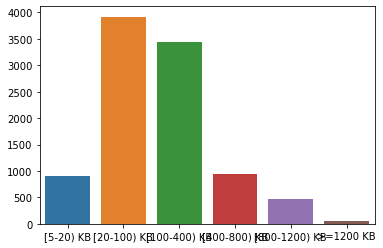

In [3]:
import sys
import os
from collections import Counter
from seaborn import barplot
import pandas as pd
import matplotlib.pyplot as plt

def dodir(path):
    global h
    for name in os.listdir(path):
        p = os.path.join(path, name)
        h[os.stat(p).st_size] += 1
        if os.path.isdir(p):
            dodir(p)
        else:
            pass


def size_counter(arg):
    global h
    size_dict = {'[5-20) KB': 0, '[20-100) KB': 0, '[100-400) KB': 0, '[400-800) KB': 0,
                 '[800-1200) KB': 0, '>=1200 KB': 0}
    first, second, third, fourth, fifth, sixth = 0, 0, 0, 0, 0, 0
    h = Counter()
    counter = []
    for dir in arg:
        dodir(dir)
    s = n = 0
    for k, v in sorted(h.items()):
        counter.append((k, v))
        n += v
        s += k * v
    for k, v in counter:
        if k >= 5000 and k < 20000:
            first += v
        elif k>= 20000 and k< 100000:
            second += v
        elif k >= 100000 and k < 400000:
            third += v
        elif k >= 400000 and k < 800000:
            fourth += v
        elif k >= 800000 and k < 1200000:
            fifth += v
        else:
            sixth += v
    y_list = list(size_dict.keys())
    x_list = [first, second, third, fourth, fifth, sixth]
    result_dict = dict()

    for key, val in zip(y_list, x_list):
        result_dict[key] = val
    print("Total %d bytes for %d files" % (s, n))
    print(sum(result_dict.values()))
    return result_dict


size_distribution = size_counter([path])
df = pd.DataFrame(data=size_distribution, index=[0])
print(df)
barplot(data=df)
plt.show()


In [1]:
path = '/root/malware_volume/MALWARE'